In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import zscore
from sklearn.linear_model import Ridge

### Baseline model

In [2]:
ca_whole = pd.read_csv('ca_whole.csv')

In [3]:
ca_whole.columns

Index(['County Name', 'Date Local', 'Month', 'AQI', 'Category', 'Latitude',
       'Longitude', 'AQI_so2', 'Arithmetic Mean_so2', '1st Max Value_so2',
       'AQI_no2', 'Arithmetic Mean_no2', '1st Max Value_no2', 'AQI_co',
       'Arithmetic Mean_co', '1st Max Value_co', 'AQI_ozone',
       'Arithmetic Mean_ozone', '1st Max Value_ozone', 'Arithmetic Mean_temp',
       '1st Max Value_temp', 'Arithmetic Mean_wind', '1st Max Value_wind'],
      dtype='object')

Write a function to standardize each column

In [5]:
def standard_unit(df):
    df = df.apply(zscore)
    return df

In [6]:
predictors = ca_whole.drop(columns=['County Name', 'Date Local','AQI', 'Category'])
predictors_standard = standard_unit(predictors)
observed = ca_whole['AQI']

In [7]:
random_state = 42
X = predictors_standard
y = observed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# fit the linear model and make predictions
lm_model = lm.LinearRegression(fit_intercept=True)
y_fitted = lm_model.fit(X_train, y_train).predict(X_train)
y_predicted = lm_model.fit(X_train, y_train).predict(X_test)

# compute RMSE on train and test sets
train_rmse = mean_squared_error(y_train, y_fitted, squared=False)
test_rmse = mean_squared_error(y_test, y_predicted, squared=False)

train_rmse, test_rmse

(22.542334253990287, 18.78140427792743)

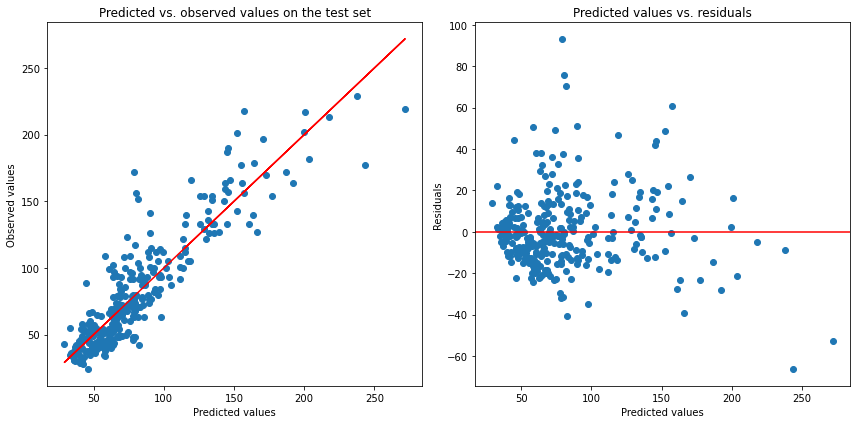

In [9]:
plt.figure(figsize=(12,6))      # do not change this line

plt.subplot(121)                # do not change this line
# (1) predictions vs observations
plt.scatter(y_predicted, y_test)
plt.plot(y_predicted, y_predicted, linestyle='-', color='r')
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.title('Predicted vs. observed values on the test set')

plt.subplot(122)               # do not change this line
# (2) residual plot
plt.scatter(y_predicted, y_test-y_predicted)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted values vs. residuals')

plt.tight_layout()             # do not change this line

In [10]:
predictors.columns.to_list()

['Month',
 'Latitude',
 'Longitude',
 'AQI_so2',
 'Arithmetic Mean_so2',
 '1st Max Value_so2',
 'AQI_no2',
 'Arithmetic Mean_no2',
 '1st Max Value_no2',
 'AQI_co',
 'Arithmetic Mean_co',
 '1st Max Value_co',
 'AQI_ozone',
 'Arithmetic Mean_ozone',
 '1st Max Value_ozone',
 'Arithmetic Mean_temp',
 '1st Max Value_temp',
 'Arithmetic Mean_wind',
 '1st Max Value_wind']

In [11]:
list(zip(predictors.columns.to_list(), lm_model.coef_))

[('Month', 3.108261445504953),
 ('Latitude', 1.578625779101099),
 ('Longitude', 7.348537890948751),
 ('AQI_so2', 1.493481398265722),
 ('Arithmetic Mean_so2', 2.2389834143564338),
 ('1st Max Value_so2', -2.885974294594167),
 ('AQI_no2', -8.710718268995944),
 ('Arithmetic Mean_no2', 7.64833507969086),
 ('1st Max Value_no2', -1.501967411992899),
 ('AQI_co', 6.90708139245797),
 ('Arithmetic Mean_co', 9.311602779165947),
 ('1st Max Value_co', -2.6914469686111158),
 ('AQI_ozone', 40.83671549297599),
 ('Arithmetic Mean_ozone', -7.411585483528897),
 ('1st Max Value_ozone', -4.20362438283048),
 ('Arithmetic Mean_temp', -1.9578220052756128),
 ('1st Max Value_temp', -0.41162982859102515),
 ('Arithmetic Mean_wind', 17.17028804369154),
 ('1st Max Value_wind', -13.663224111464977)]

### Remove outliers

Remove data that are greater than 2.5 standard deviation. 

In [12]:
non_outlier = ca_whole['AQI'][~((ca_whole['AQI']-ca_whole['AQI'].mean()).abs() > 2.5*ca_whole['AQI'].std())].index

In [17]:
random_state = 42
x = predictors.loc[non_outlier,:]
X = standard_unit(x)
y = observed[non_outlier]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [18]:
# fit the linear model and make predictions
lm_model = lm.LinearRegression(fit_intercept=True)
y_fitted = lm_model.fit(X_train, y_train).predict(X_train)
y_predicted = lm_model.fit(X_train, y_train).predict(X_test)

# compute RMSE on train and test sets
train_rmse = mean_squared_error(y_train, y_fitted, squared=False)
test_rmse = mean_squared_error(y_test, y_predicted, squared=False)

train_rmse, test_rmse

(17.98375701489659, 19.669107082099593)

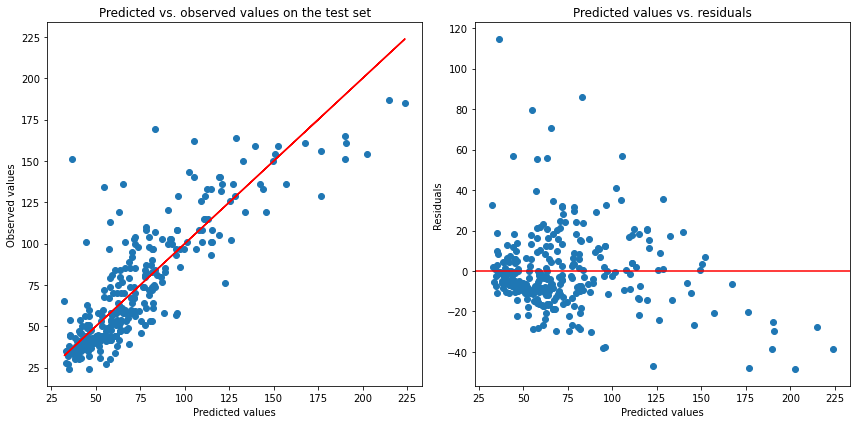

In [19]:
plt.figure(figsize=(12,6))      # do not change this line

plt.subplot(121)                # do not change this line
# (1) predictions vs observations
plt.scatter(y_predicted, y_test)
plt.plot(y_predicted, y_predicted, linestyle='-', color='r')
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.title('Predicted vs. observed values on the test set')

plt.subplot(122)               # do not change this line
# (2) residual plot
plt.scatter(y_predicted, y_test-y_predicted)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted values vs. residuals')

plt.tight_layout()             # do not change this line

In [20]:
list(zip(predictors.columns.to_list(), lm_model.coef_))

[('Month', 3.2627805752780144),
 ('Latitude', 1.0824840353376555),
 ('Longitude', 6.376060982249841),
 ('AQI_so2', 0.8854128473274342),
 ('Arithmetic Mean_so2', 1.3670426680536445),
 ('1st Max Value_so2', -2.2025313190425404),
 ('AQI_no2', 2.4473415589836245),
 ('Arithmetic Mean_no2', 7.471931648564211),
 ('1st Max Value_no2', -11.146462859075662),
 ('AQI_co', 9.229738093600215),
 ('Arithmetic Mean_co', 8.629096460844593),
 ('1st Max Value_co', -6.474687507497544),
 ('AQI_ozone', 36.66691568964311),
 ('Arithmetic Mean_ozone', -6.733877249477436),
 ('1st Max Value_ozone', -4.787700681952436),
 ('Arithmetic Mean_temp', -1.874505354685153),
 ('1st Max Value_temp', -0.4104644953578217),
 ('Arithmetic Mean_wind', 10.77426164019763),
 ('1st Max Value_wind', -7.770027759641909)]